# <font color='blue'>Video Game Sales Prediction 1980 - 2020</font>

## Table of Contents
5. [Exploratory Analysis](#e_ID)

    5.1 [Heirarchical Clustering](#e1_ID)
    
    5.2 [K-means Clustering](#e2_ID)

## <a id="e_ID">5. Exploratory Analysis</a>

### <a id="e1_ID">5.1 Heirarchical Clustering</a>

Heirarchical clustering displays a set of nested clusters as a heirarchical tree. Merges and splits are displayed and close items are depicted by the height of bars.

In [63]:
# Create dataframe with numeric features
vgsales_numeric = pd.DataFrame(vgsales, columns = ["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"])
vgsales_numeric

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,41.49,29.02,3.77,8.46,82.74
1,2,29.08,3.58,6.81,0.77,40.24
2,3,15.85,12.88,3.79,3.31,35.82
3,4,15.75,11.01,3.28,2.96,33.00
4,5,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
16593,16596,0.01,0.00,0.00,0.00,0.01
16594,16597,0.01,0.00,0.00,0.00,0.01
16595,16598,0.00,0.00,0.00,0.00,0.01
16596,16599,0.00,0.01,0.00,0.00,0.01


In [64]:
# Import linkage and denrogram libraries
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [65]:
mergings = linkage(vgsales_numeric, method='complete')

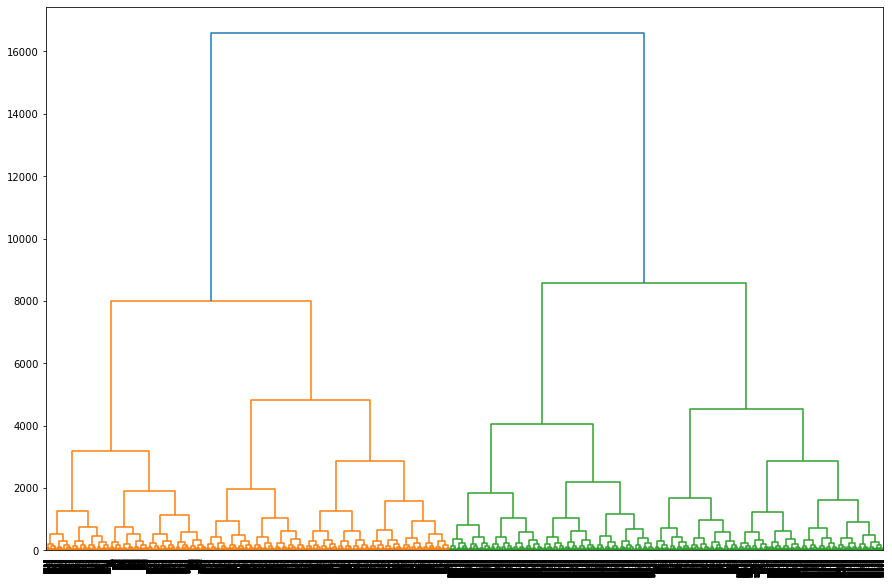

In [67]:
plt.figure(figsize=(15,10))
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

### <a id="e2_ID">5.2 K-means Clustering</a>

K-means clustering is an unsupervised machine learning algorithm used to classify data into clusters. Data points within a cluster are similar to each other and data points from separate clusters are different from each other.

In [68]:
# Import KMeans library
from sklearn.cluster import KMeans

In [69]:
# Instantiate KMeans object with n_clusters=2
kmeansModel2 = KMeans(n_clusters=2, random_state=31)

In [70]:
# Fit dataset to KMeans object
kmeansModel2.fit(vgsales_numeric)

KMeans(n_clusters=2, random_state=31)

In [71]:
# Show cluster centers
kmeansModel2.cluster_centers_

array([[1.24587898e+04, 3.31840135e-02, 1.34882879e-02, 1.88613861e-02,
        4.00024149e-03, 7.01557595e-02],
       [4.15942148e+03, 4.95204425e-01, 2.79271284e-01, 1.36461039e-01,
        9.19456469e-02, 1.00281506e+00]])

In [72]:
# Show cluster labels
kmeansModel2.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [73]:
# Instantiate KMeans object with n_clusters=4
kmeansModel4 = KMeans(n_clusters=4, random_state=32)

In [74]:
# Fit dataset to KMeans object
kmeansModel4.fit(vgsales_numeric)

KMeans(n_clusters=4, random_state=32)

In [75]:
# Show cluster centers
kmeansModel4.cluster_centers_

array([[2.05534104e+03, 8.48607595e-01, 4.96896300e-01, 2.20939630e-01,
        1.61735638e-01, 1.72822055e+00],
       [1.03880000e+04, 5.54499881e-02, 2.00931010e-02, 2.59823347e-02,
        7.06373836e-03, 1.08708522e-01],
       [6.20150000e+03, 1.50623805e-01, 6.70100382e-02, 5.40176864e-02,
        2.38910134e-02, 2.95363289e-01],
       [1.45415829e+04, 1.07796940e-02, 6.88365315e-03, 1.17925674e-02,
        9.20573233e-04, 3.15108088e-02]])

In [76]:
# Show cluster labels
kmeansModel4.labels_

array([0, 0, 0, ..., 3, 3, 3])

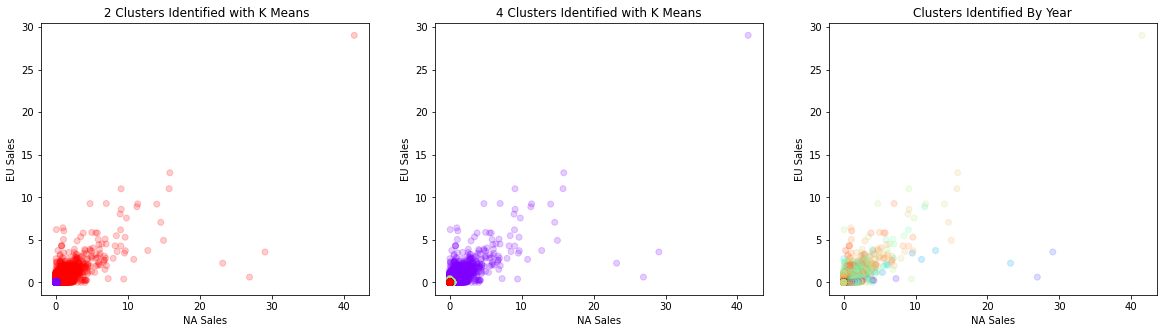

In [79]:
# Scatterplots of K-means with 2 clusters, 4 clusters, and by Class
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.scatter(vgsales_numeric.loc[:,'NA_Sales'], vgsales_numeric.loc[:,'EU_Sales'], c=kmeansModel2.labels_, 
            cmap='rainbow', alpha=0.2)
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')
plt.title(' 2 Clusters Identified with K Means')

plt.subplot(1, 3, 2)
plt.scatter(vgsales_numeric.loc[:,'NA_Sales'], vgsales_numeric.loc[:,'EU_Sales'], c=kmeansModel4.labels_, 
            cmap='rainbow', alpha=0.2)
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')
plt.title('4 Clusters Identified with K Means')

plt.subplot(1, 3, 3)
plt.scatter(vgsales.loc[:,'NA_Sales'], vgsales.loc[:,'EU_Sales'], c=vgsales.loc[:,'Year'], 
            label=vgsales.loc[:,'Year'].unique(), cmap='rainbow', alpha=0.2)
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')
plt.title('Clusters Identified By Year')

plt.show()

From the figures above, we can see that there are two clusters for North American Sales vs European Sales. When clusters were identified by Year, the clusters seem to be more scattered indicating there is no clear pattern between North American and European Sales by Year.